In [130]:
import cv2
import numpy as np
import os
from random import shuffle
from tqdm import tqdm
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [131]:
train_data = 'data/train'
test_data = 'data/test'

In [132]:
def one_hot_label(label):
    if label=='1':
        ohl = np.array([1,0])
    elif label == '0':
        ohl = np.array([0,1])
    return ohl 

In [133]:
def train_data_with_labels():
    train_images = []
    for dir in os.listdir('data/train'):
        label=str(dir)
        print(label)
        dir = os.path.join(os.getcwd(),os.path.join('data/train',dir))
        for img in os.listdir(dir):
            path = os.path.join(dir,img)
            img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, (28,28))
            train_images.append([np.array(img), one_hot_label(label)])
    shuffle(train_images)
    return train_images        

In [134]:
def test_data_with_labels():
    test_images = []
    for dir in os.listdir('data/test'):
        label=str(dir)
        print(label)
        dir = os.path.join(os.getcwd(),os.path.join('data/test',dir))
        for img in os.listdir(dir):
            path = os.path.join(dir,img)
            img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, (28,28))
            test_images.append([np.array(img), one_hot_label(label)])
    shuffle(test_images)
    return test_images        

In [135]:
from keras.models import Sequential
from keras.layers import *
from keras.optimizers import *

In [136]:
training_images = train_data_with_labels()
testing_images = test_data_with_labels()
tr_img_data = np.array([i[0] for i in training_images]).reshape(-1,28,28,1)
tr_lbl_data = np.array([i[1] for i in training_images])
tst_img_data = np.array([i[0] for i in testing_images]).reshape(-1,28,28,1)
tst_lbl_data = np.array([i[1] for i in testing_images])

0
1
0
1


In [156]:
model = Sequential()

model.add(InputLayer(input_shape=[28,28,1]))
model.add(Conv2D(filters=32, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=5, padding='same', dim_ordering="th"))

model.add(Conv2D(filters=50, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=5, padding='same', dim_ordering="th"))

model.add(Conv2D(filters=80, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=5, padding='same', dim_ordering="th"))

model.add(Conv2D(filters=100, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=5, padding='same', dim_ordering="th"))

model.add(Dropout(0.5))
model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(512, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(2, activation='softmax'))
optimizer = Adam(lr=1e-3)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x=tr_img_data, y= tr_lbl_data, epochs=70, batch_size=100)
model.summary()

/home/vishnoitanuj/miniconda3/envs/CV/lib/python3.5/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D(data_format="channels_first", pool_size=5, padding="same")`
  """
/home/vishnoitanuj/miniconda3/envs/CV/lib/python3.5/site-packages/ipykernel_launcher.py:8: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D(data_format="channels_first", pool_size=5, padding="same")`
  
/home/vishnoitanuj/miniconda3/envs/CV/lib/python3.5/site-packages/ipykernel_launcher.py:11: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D(data_format="channels_first", pool_size=5, padding="same")`
  # This is added back by InteractiveShellApp.init_path()
/home/vishnoitanuj/miniconda3/envs/CV/lib/python3.5/site-packages/ipykernel_launcher.py:14: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D(data_format="channels_first", pool_size=5, padding="same")`
  


Epoch 1/70
482/482 [==============================] - 1s 2ms/step - loss: 2.5871 - acc: 0.4876
Epoch 2/70
482/482 [==============================] - 0s 575us/step - loss: 0.6977 - acc: 0.6349
Epoch 3/70
482/482 [==============================] - 0s 532us/step - loss: 0.4226 - acc: 0.8382
Epoch 4/70
482/482 [==============================] - 0s 560us/step - loss: 0.2228 - acc: 0.9315
Epoch 5/70
482/482 [==============================] - 0s 527us/step - loss: 0.1337 - acc: 0.9481
Epoch 6/70
482/482 [==============================] - 0s 543us/step - loss: 0.1193 - acc: 0.9689
Epoch 7/70
482/482 [==============================] - 0s 576us/step - loss: 0.0946 - acc: 0.9668
Epoch 8/70
482/482 [==============================] - 0s 546us/step - loss: 0.0801 - acc: 0.9772
Epoch 9/70
482/482 [==============================] - 0s 520us/step - loss: 0.0613 - acc: 0.9813
Epoch 10/70
482/482 [==============================] - 0s 554us/step - loss: 0.0352 - acc: 0.9855
Epoch 11/70
482/482 [==========

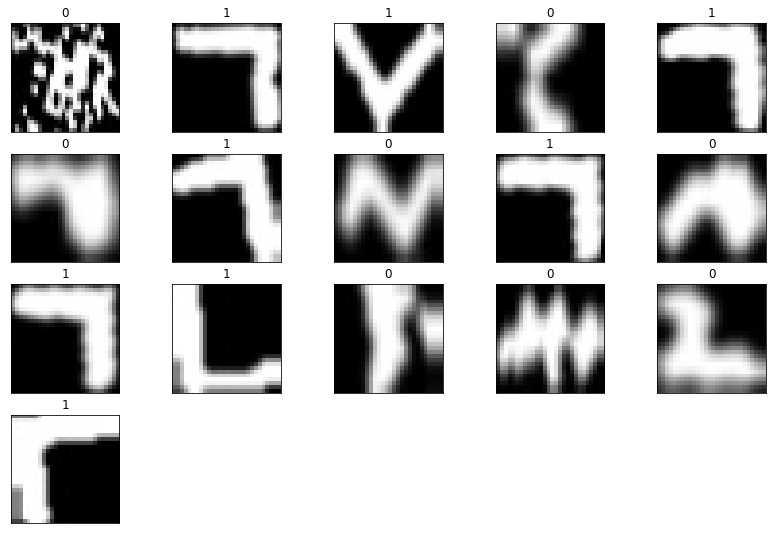

In [157]:
fig = plt.figure(figsize=(14,14))

for cnt, data in enumerate(testing_images[0:]):
    y = fig.add_subplot(6,5, cnt+1)
    img = data[0]
    data = img.reshape(1,28,28,1)
    model_out = model.predict([data])
    
    if np.argmax(model_out)==1:
        str_label = '0'
    else:
        str_label = '1'
        
    y.imshow(img, cmap='gray')
    plt.title(str_label)
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)

In [164]:
from image_process import (
    threshold,
    morphology,
    find_contours,
    extra_contour_elimination,
    crop_contour,
    req_contour
)
import csv
import os
import cv2
import numpy as np

In [165]:
dest_dir = 'plot'
def plot(filename,file):
    img = cv2.imread(filename)
#     img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    clone = img.copy()
    thresh = threshold(img)
    img, lines = find_contours(thresh)
    final_lines = extra_contour_elimination(lines)
    req = []
    for i,line in enumerate(final_lines):
        L = crop_contour(line,thresh)
        img = cv2.resize(L,(28,28))
        data = img.reshape(1,28,28,1)
        model_out = model.predict([data])

        if np.argmax(model_out)==1:
            str_label = '0'
        else:
            str_label = '1'

        if str_label=='1':
            print(line)
            req.append(i)
            name = dest_dir+'/'+file
#             print(name)
            

    for index in req:
        rect = cv2.minAreaRect(final_lines[index])
        box = cv2.boxPoints(rect)
        box = np.int0(box)
        cv2.drawContours(clone,[box],0,(0,255,0),4)
        cv2.imwrite(name,clone)


In [166]:
orig_dir = 'CV-Assignment-Dataset'
for file in os.listdir(orig_dir):
    path = os.path.join(orig_dir,file)
    plot(path,file)

[[[2145  847]]

 [[2145  854]]

 [[2146  855]]

 [[2146  857]]

 [[2147  858]]

 [[2147  864]]

 [[2146  865]]

 [[2145  865]]

 [[2143  867]]

 [[2141  867]]

 [[2139  869]]

 [[2138  869]]

 [[2135  872]]

 [[2135  874]]

 [[2136  875]]

 [[2138  875]]

 [[2139  874]]

 [[2140  874]]

 [[2142  872]]

 [[2143  872]]

 [[2144  871]]

 [[2145  871]]

 [[2146  870]]

 [[2148  870]]

 [[2149  869]]

 [[2150  869]]

 [[2153  866]]

 [[2154  866]]

 [[2155  865]]

 [[2155  862]]

 [[2154  861]]

 [[2154  860]]

 [[2153  859]]

 [[2153  857]]

 [[2152  856]]

 [[2152  855]]

 [[2151  854]]

 [[2151  852]]

 [[2149  850]]

 [[2149  848]]

 [[2148  847]]]
[[[2611 2238]]

 [[2610 2239]]

 [[2606 2239]]

 [[2605 2240]]

 [[2602 2240]]

 [[2601 2241]]

 [[2599 2241]]

 [[2598 2242]]

 [[2596 2242]]

 [[2594 2240]]

 [[2591 2240]]

 [[2589 2242]]

 [[2585 2242]]

 [[2585 2245]]

 [[2586 2246]]

 [[2586 2249]]

 [[2587 2250]]

 [[2587 2254]]

 [[2588 2255]]

 [[2588 2258]]

 [[2589 2259]]

 [[2589 

[[[3783   28]]

 [[3782   29]]

 [[3779   29]]

 [[3778   30]]

 [[3775   30]]

 [[3775   35]]

 [[3776   36]]

 [[3776   39]]

 [[3777   40]]

 [[3779   40]]

 [[3779   37]]

 [[3778   36]]

 [[3778   33]]

 [[3779   32]]

 [[3781   32]]

 [[3782   31]]

 [[3786   31]]

 [[3787   30]]

 [[3787   28]]]
[[[1728 2972]]

 [[1728 2976]]

 [[1727 2977]]

 [[1723 2977]]

 [[1722 2976]]

 [[1719 2976]]

 [[1718 2977]]

 [[1718 2978]]

 [[1717 2979]]

 [[1716 2979]]

 [[1716 2982]]

 [[1724 2982]]

 [[1725 2983]]

 [[1729 2983]]

 [[1730 2984]]

 [[1732 2984]]

 [[1733 2985]]

 [[1733 2986]]

 [[1736 2989]]

 [[1736 2992]]

 [[1735 2993]]

 [[1734 2993]]

 [[1734 2994]]

 [[1733 2995]]

 [[1728 2995]]

 [[1728 2996]]

 [[1727 2997]]

 [[1723 2997]]

 [[1722 2998]]

 [[1719 2998]]

 [[1719 2999]]

 [[1739 2999]]

 [[1739 2998]]

 [[1738 2998]]

 [[1736 2996]]

 [[1736 2993]]

 [[1737 2992]]

 [[1738 2992]]

 [[1738 2981]]

 [[1736 2979]]

 [[1735 2979]]

 [[1734 2978]]

 [[1732 2978]]

 [[1731 